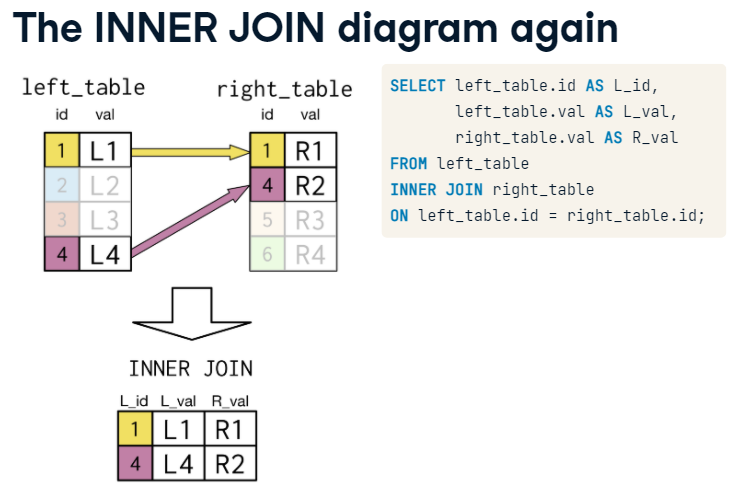
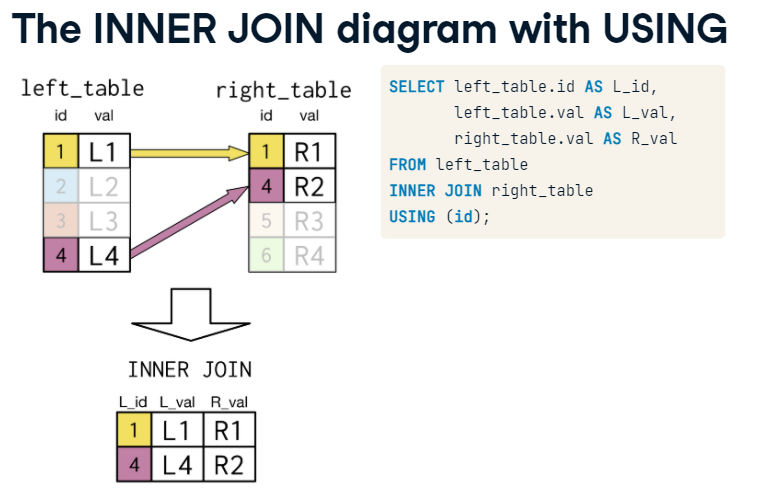


When joining tables with a common field name, e.g.
```
SELECT *
FROM countries
  INNER JOIN economies
    ON countries.code = economies.code
```
You can use USING as a shortcut:
```
SELECT *
FROM countries
  INNER JOIN economies
    USING(code)
 ```

The countries table is given by:
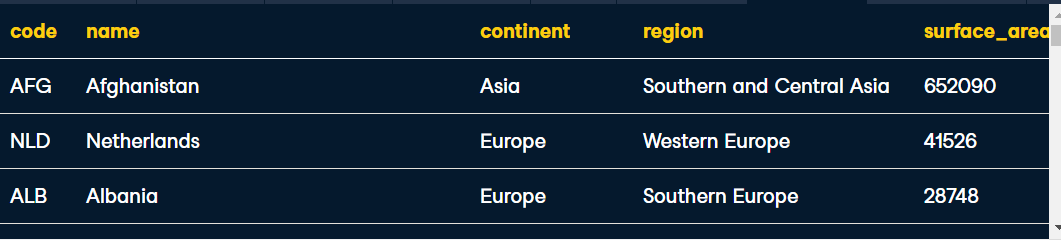
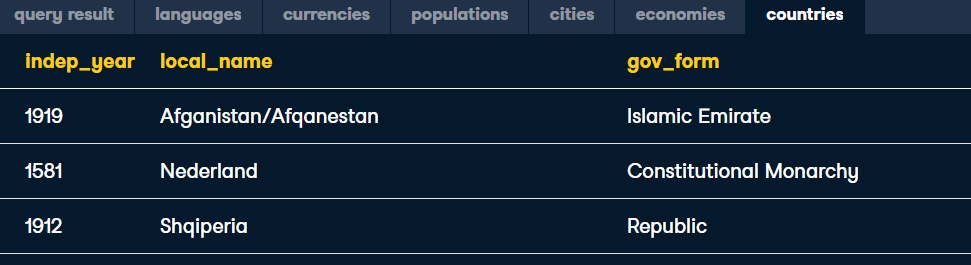
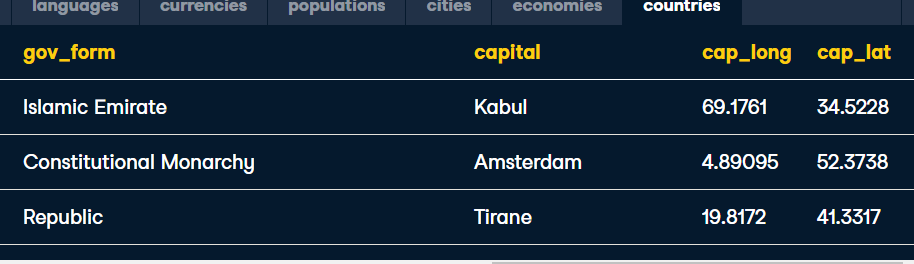

and languages table is given by
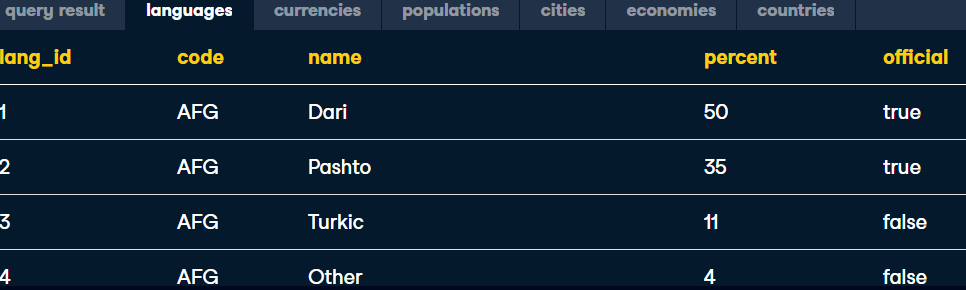
- Inner join countries on the left and languages on the right with USING(code).
    - Select the fields corresponding to:
        - country name AS country,
            - continent name,
            - language name AS language, and
            - whether or not the language is official.
- Remember to alias your tables using the first letter of their names.
```
SELECT c.name AS country,continent, l.name as language,official
  FROM countries as c
  INNER JOIN languages as l
    USING(code);
```
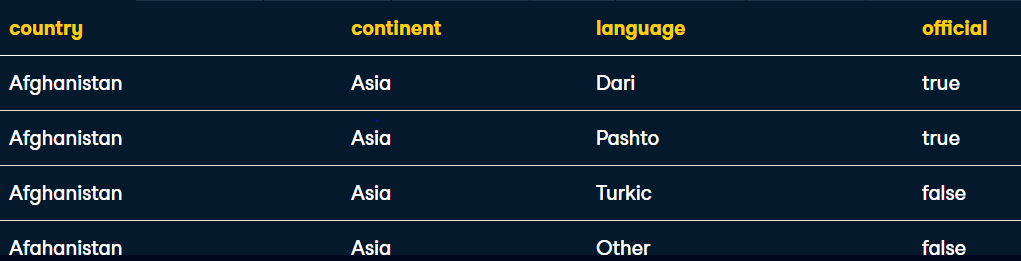


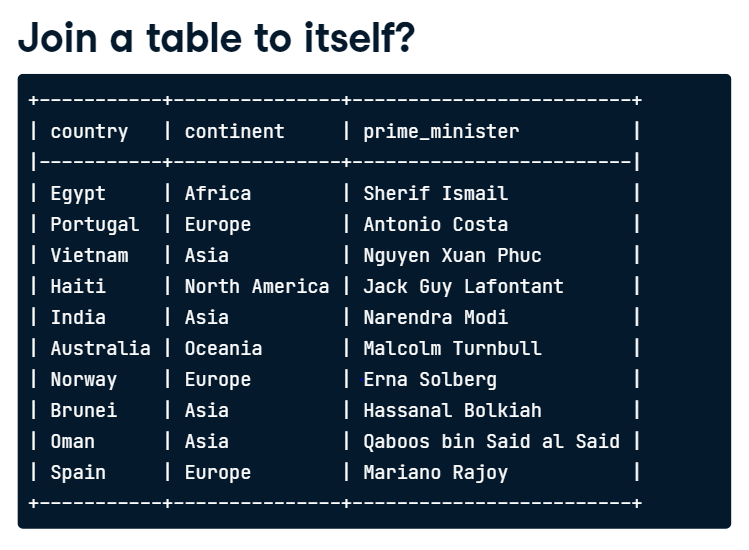
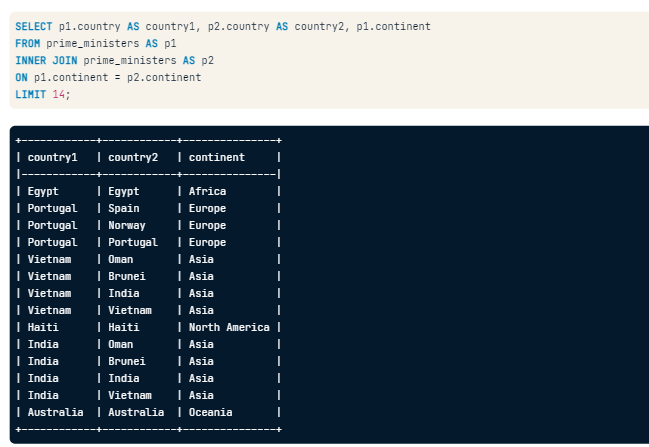
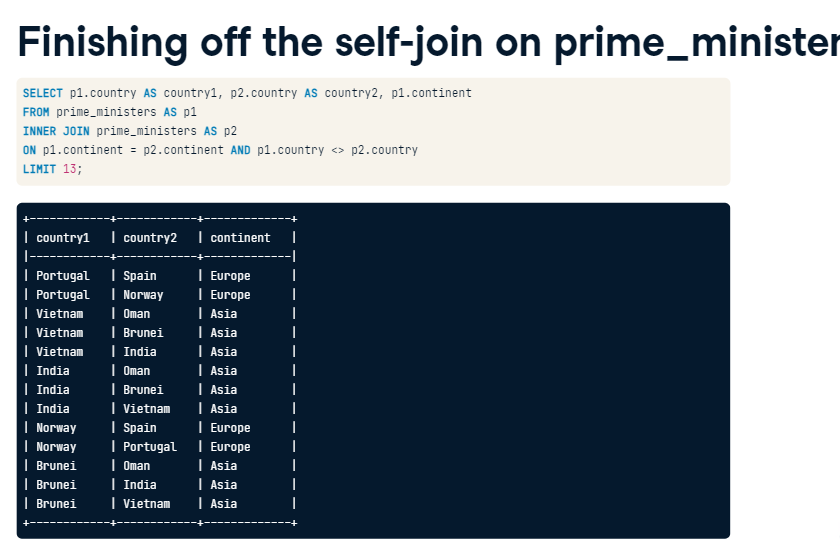
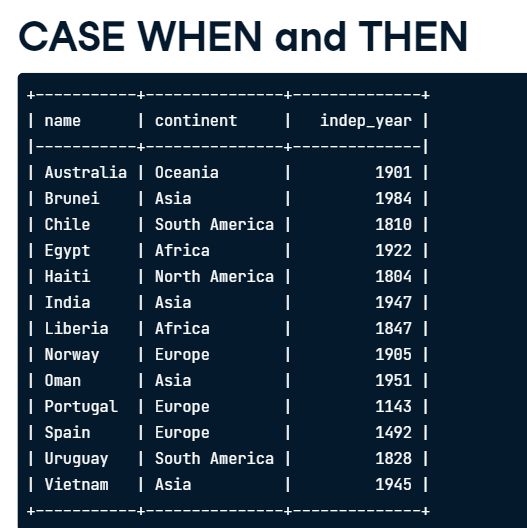
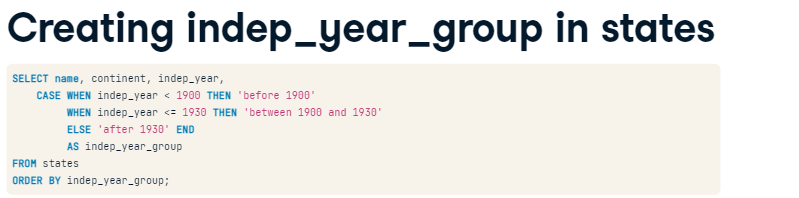

#### Self-join
In this exercise, you'll use the populations table to perform a self-join to calculate the percentage increase in population from 2010 to 2015 for each country code!

Since you'll be joining the populations table to itself, you can alias populations as p1 and also populations as p2. 



- Join populations with itself ON country_code.
- Select the country_code from p1 and the size field from both p1 and p2. SQL won't allow same-named fields, so alias p1.size as size2010 and p2.size as size2015.

```
SELECT p1.country_code,
       p1.size AS size2010,
       p2.size AS size2015
FROM populations AS p1
  INNER JOIN populations AS p2
    ON  p1.country_code = p2.country_code;
  ```
  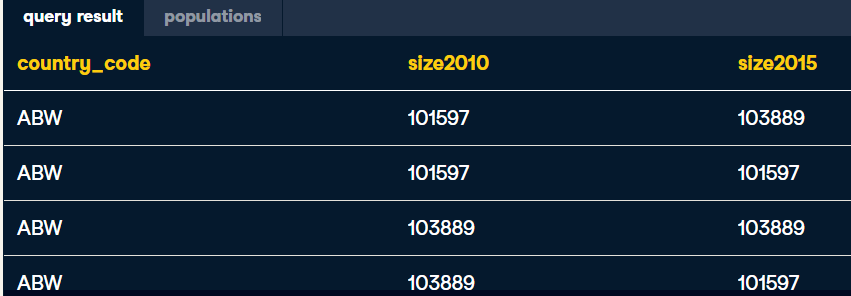
  
  Notice from the result that for each country_code you have four entries laying out all combinations of 2010 and 2015.

- Extend the ON in your query to include only those records where the p1.year (2010) matches with p2.year - 5 (2015 - 5 = 2010). This will omit the three entries per country_code that you aren't interested in.
```
SELECT p1.country_code,
       p1.size AS size2010,
       p2.size AS size2015
FROM populations AS p1
  INNER JOIN populations AS p2
    ON p1.country_code = p2.country_code
        AND p1.year = p2.year - 5;
```
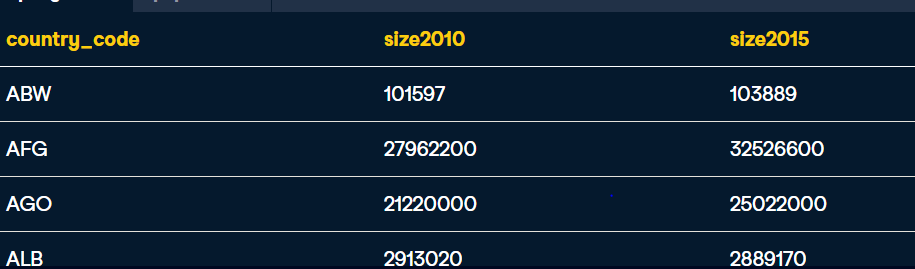

- Add a new field to SELECT, aliased as growth_perc, that calculates the percentage population growth from 2010 to 2015 for each country, using p2.size and p1.size.

```
SELECT p1.country_code,
       p1.size AS size2010, 
       p2.size AS size2015,
       (( p2.size- p1.size)/p1.size * 100.0) AS growth_perc
FROM populations AS p1
  INNER JOIN populations AS p2
    ON p1.country_code = p2.country_code
        AND p1.	year = p2.	year - 5;
```
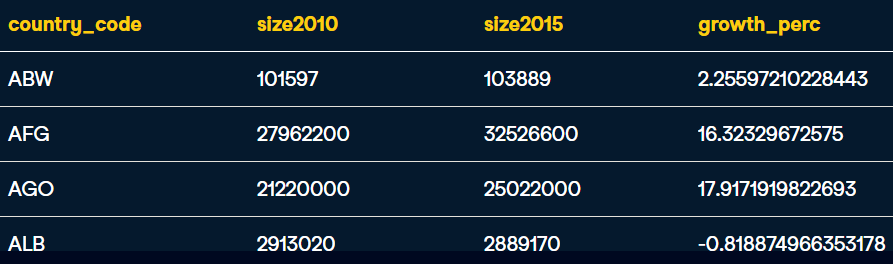

- Using the countries table, create a new field AS geosize_group that groups the countries into three groups:

    - If surface_area is greater than 2 million, geosize_group is 'large'.
     - If surface_area is greater than 350 thousand but not larger than 2 million, geosize_group is 'medium'.
      - Otherwise, geosize_group is 'small'.

```
SELECT name, continent, code, surface_area,
    CASE WHEN  surface_area > 2000000 THEN 'large'
        WHEN surface_area > 350000 THEN 'medium'
        ELSE 'small' END
        AS geosize_group
-- 5. From table
FROM countries;
```
The table you created with the added geosize_group field has been loaded for you here with the name countries_plus. Observe the use of (and the placement of) the INTO command to create this countries_plus table:
```
SELECT name, continent, code, surface_area,
    CASE WHEN surface_area > 2000000
            THEN 'large'
       WHEN surface_area > 350000
            THEN 'medium'
       ELSE 'small' END
       AS geosize_group
INTO countries_plus
FROM countries;
```
- Using the populations table focused only for the year 2015, create a new field aliased as popsize_group to organize population size into
    - 'large' (> 50 million),
    -  'medium' (> 1 million), and 'small' groups.
- Select only the country code, population size, and this new popsize_group as fields.

```
SELECT country_code, size,
    CASE WHEN size > 50000000 THEN 'large'
        WHEN size > 1000000 THEN 'medium'
        ELSE 'small' END
        AS popsize_group
FROM populations
WHERE  year= 2015 ;
```
- Use INTO to save the result of the previous query as pop_plus. You can see an example of this in the countries_plus code in the assignment text. Make sure to include a ; at the end of your WHERE clause!

Then, include another query below your first query to display all the records in pop_plus using SELECT * FROM pop_plus; so that you generate results and this will display pop_plus in query result.

```
SELECT country_code, size,
    CASE WHEN size > 50000000 THEN 'large'
        WHEN size > 1000000 THEN 'medium'
        ELSE 'small' END
        AS popsize_group
INTO pop_plus
FROM populations
WHERE year = 2015;
SELECT * FROM pop_plus;
```
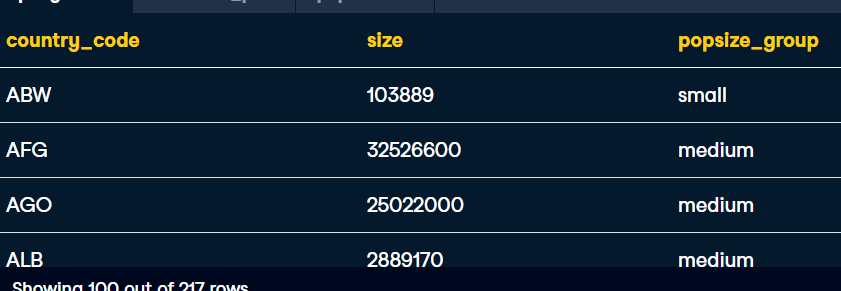

- Keep the first query intact that creates pop_plus using INTO.
- Write a query to join countries_plus AS c on the left with pop_plus AS p on the right matching on the country code fields.
- Sort the data based on geosize_group, in ascending order so that large appears on top.
- Select the name, continent, geosize_group, and popsize_group fields


```
SELECT country_code, size,
  CASE WHEN size > 50000000
            THEN 'large'
       WHEN size > 1000000
            THEN 'medium'
       ELSE 'small' END
       AS popsize_group
INTO pop_plus       
FROM populations
WHERE year = 2015;

SELECT name, continent, geosize_group,popsize_group
FROM countries_plus AS c
    INNER JOIN pop_plus AS p
    ON
    c.code = p.country_code
ORDER BY geosize_group;
```
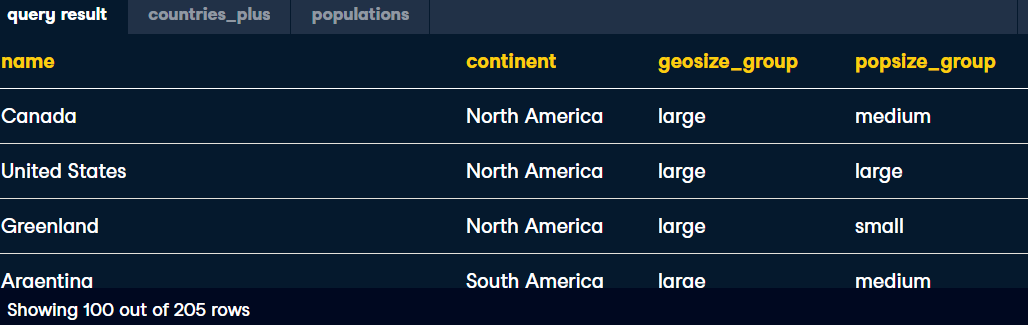